In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (135).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (21).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (334).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (316).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (92).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (1).jpeg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (12).jpeg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (308).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (410).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (99).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (24).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (225).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp/ncvc (88).jpg
/kaggle/input/edible-and-poisonous-fungi/edible sporocarp

# Edible and Poisonous Fungi

Bu projede 4 tip mantarı sınıflandırmaya çalışan derin öğrenme modelleri geliştirilmektedir.

Projede kullanılan veriler [buradan](https://www.kaggle.com/datasets/marcosvolpato/edible-and-poisonous-fungi) temin edilmiştir.

![](https://cdn.britannica.com/79/145379-050-4461FF66/Death-cap-mushroom.jpg)

In [12]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
img_path="/kaggle/input/edible-and-poisonous-fungi/"
labels = [item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, item))]

In [8]:
labels

['edible sporocarp',
 'poisonous sporocarp',
 'edible mushroom sporocarp',
 'poisonous mushroom sporocarp']

In [9]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        for img_file in os.listdir(dir+label):
            img_list.append(dir+label+"/"+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [10]:
df=set_df(img_path)
df.sample(10)

,img,label
149,/kaggle/input/edible-and-poisonous-fungi/edibl...,edible sporocarp
897,/kaggle/input/edible-and-poisonous-fungi/poiso...,poisonous sporocarp
2167,/kaggle/input/edible-and-poisonous-fungi/edibl...,edible mushroom sporocarp
2973,/kaggle/input/edible-and-poisonous-fungi/poiso...,poisonous mushroom sporocarp
1630,/kaggle/input/edible-and-poisonous-fungi/poiso...,poisonous sporocarp
2667,/kaggle/input/edible-and-poisonous-fungi/poiso...,poisonous mushroom sporocarp
3,/kaggle/input/edible-and-poisonous-fungi/edibl...,edible sporocarp
2336,/kaggle/input/edible-and-poisonous-fungi/edibl...,edible mushroom sporocarp
233,/kaggle/input/edible-and-poisonous-fungi/edibl...,edible sporocarp
3205,/kaggle/input/edible-and-poisonous-fungi/poiso...,poisonous mushroom sporocarp


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     3401 non-null   object
 1   label   3401 non-null   object
dtypes: object(2)
memory usage: 53.3+ KB


In [20]:
df["label"].value_counts()

label
poisonous sporocarp             1360
poisonous mushroom sporocarp     860
edible mushroom sporocarp        715
edible sporocarp                 466
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

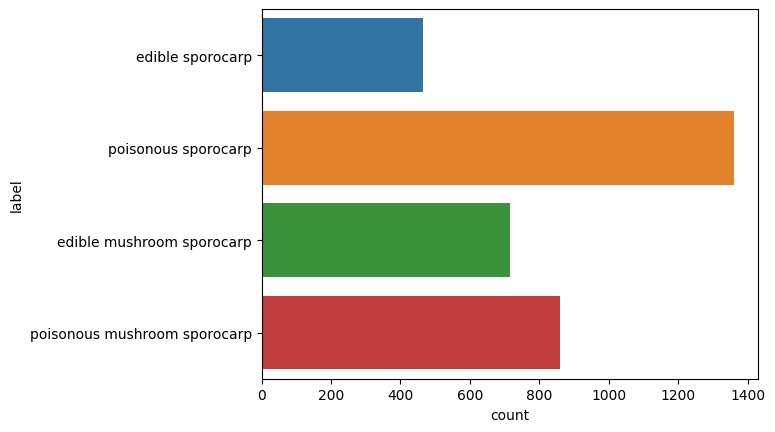

In [17]:
sns.countplot(y=df["label"])

In [62]:
df["mushroom"]= df["label"].apply(lambda x: 1 if "mushroom" in str(x) else 0)

In [63]:
df["poison"]= df["label"].apply(lambda x: 1 if "poisonous" in str(x) else 0)
#df={"poisonous sporocarp":0, "poisonous mushroom sporocarp":1, "edible mushroom sporocarp":2, "edible sporocarp":3}
#df["poison"]=df["label"].map(d)

<Axes: xlabel='count', ylabel='poison'>

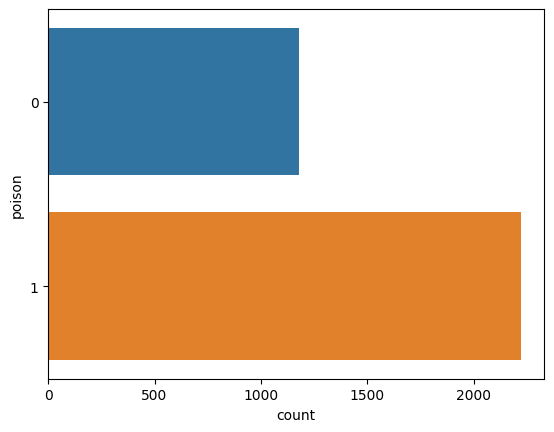

In [64]:
sns.countplot(y=df["poison"])

<Axes: xlabel='count', ylabel='mushroom'>

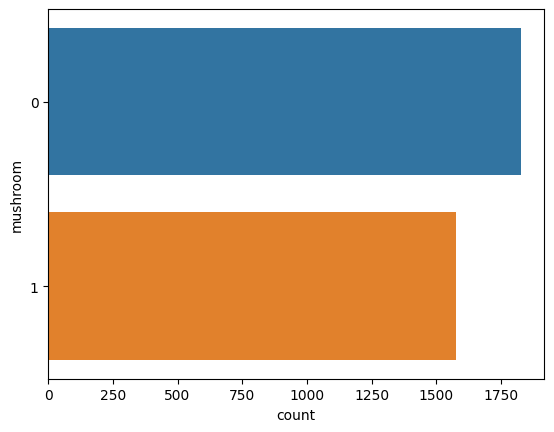

In [65]:
sns.countplot(y=df["mushroom"])

In [67]:
df=df[df["mushroom"]==1]
df = df.reset_index(drop=True)

<Axes: xlabel='count', ylabel='poison'>

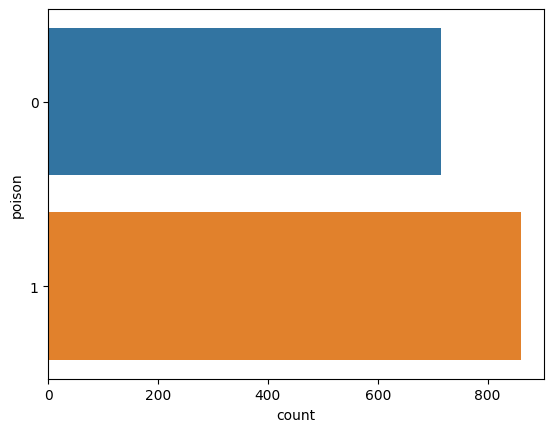

In [68]:
sns.countplot(y=df["poison"])

In [69]:
image=cv2.imread(str(df["img"][0]))
image.shape

(189, 267, 3)

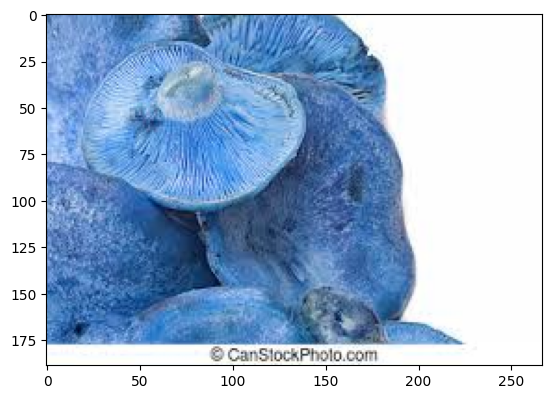

In [70]:
plt.imshow(image)

In [71]:
size=64
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge, img.shape)
    img=cv2.resize(img, (size,size)) #, cv2.INTER_LINEAR)
    img=img/255.0 
    x.append(img)

In [72]:
x=np.array(x)

In [73]:
y=df['poison'].astype(int)

## Modelleme

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1260, 64, 64, 3), (1260,), (315, 64, 64, 3), (315,))

In [127]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [121]:
"""model = Sequential()
model.add(Input(shape=(size, size, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
"""
model=Sequential()
model.add(Input(shape=(size,size,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=.5))
model.add(Dense(2, activation='softmax'))
#categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [122]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                  epochs=30, batch_size=32, verbose=1) #,  callbacks=[early_stopping])

Epoch 1/30
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5756 - loss: 2.1043

W0000 00:00:1716383073.510993     339 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5727 - loss: 2.0102

W0000 00:00:1716383078.453912     340 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.5724 - loss: 2.0019 - val_accuracy: 0.5016 - val_loss: 0.8059
Epoch 2/30
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7045 - loss: 0.6717

W0000 00:00:1716383078.958363     340 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7054 - loss: 0.6777 - val_accuracy: 0.5016 - val_loss: 1.0750
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.5107 - val_accuracy: 0.5460 - val_loss: 0.6768
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8212 - loss: 0.4323 - val_accuracy: 0.5016 - val_loss: 0.9501
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8748 - loss: 0.3056 - val_accuracy: 0.5016 - val_loss: 1.3278
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8801 - loss: 0.2993 - val_accuracy: 0.5016 - val_loss: 0.9936
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9116 - loss: 0.2259 - val_accuracy: 0.5016 - val_loss: 1.2633
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9389 - loss: 0.1489 - val_accuracy: 0.5016 - val_loss: 2.1204
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9693 - loss: 0.0856 - val_accuracy: 0.5333 - val_loss: 1.1402
Epo

In [123]:
loss, accuracy = model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 2.1663 


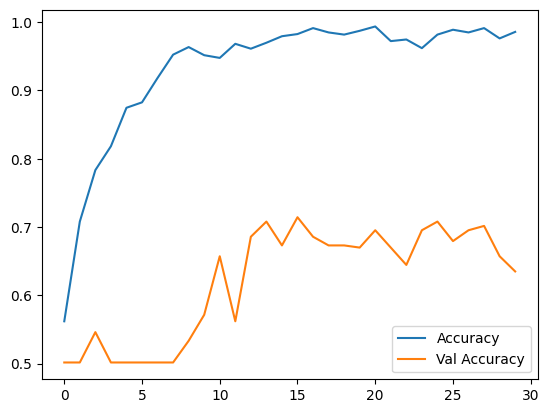

In [124]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [125]:
pred = model.predict(x_test)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step

W0000 00:00:1716383127.279240     340 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


W0000 00:00:1716383127.743798     339 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [128]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[ 66,  92],
       [ 23, 134]])

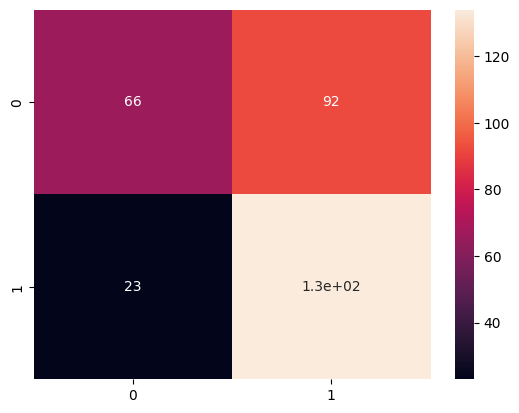

In [129]:
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [130]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.42      0.53       158
           1       0.59      0.85      0.70       157

    accuracy                           0.63       315
   macro avg       0.67      0.64      0.62       315
weighted avg       0.67      0.63      0.62       315



In [138]:
label_mapping = {1:"Zehirli", 0:"Yenilebilir"}
for num, label in label_mapping.items():
    print(f"{num}: {label}")

1: Zehirli
0: Yenilebilir


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


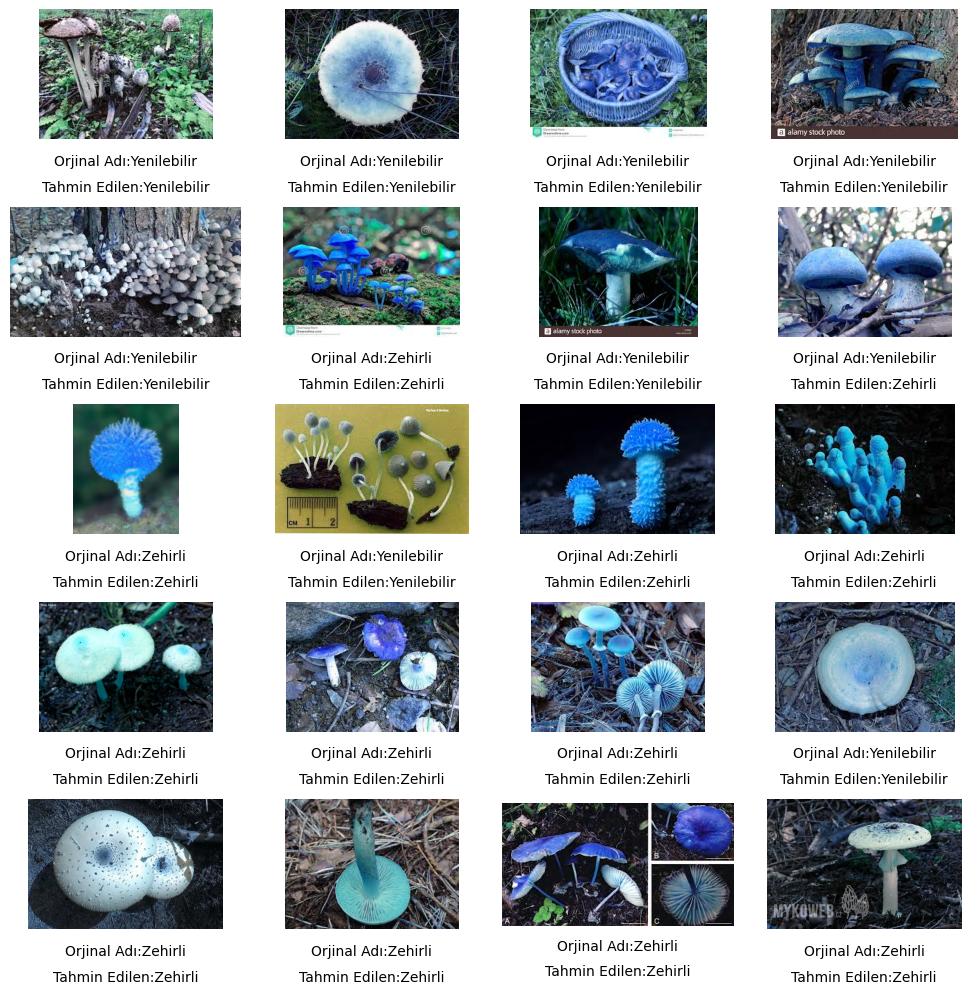

In [139]:
def tahmin(img):
    img=cv2.resize(image, (size,size))
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=img/255.0 
    img=np.array(img)
    img=np.expand_dims(img, axis=0)
    thmn=model.predict(img)
    thmn=np.argmax(thmn)
    return thmn

selected_images = df.sample(20)
selected_images = selected_images.reset_index(drop=True)

fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image=cv2.imread(str(selected_images["img"][i]))
    ax.imshow(image)
    ax.axis("off")
    pred=tahmin(image)
    ax.text(0.5, -0.2, "Orjinal Adı:"+label_mapping[selected_images["poison"][i]], transform=ax.transAxes, ha='center')
    ax.text(0.5, -0.4, "Tahmin Edilen:"+label_mapping[pred], transform=ax.transAxes, ha='center')


plt.tight_layout()
plt.show()

## Sonuç:
Zehirli ve yenilebilir mantar çeşitlerini öğrenip, tahmin eden bir model geliştirildi. Modelin Eğitim başarısı yaklaşık %99 iken Doğrulama başarısı yaklaşık %62 olmuştur. Modeldeki resimlerden rastgele seçilen 20 resim yeniden tahmin edilmiş ve sadece 19 tanesinin doğru tahmin edildiği görülmüştür.